In [51]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
df=pd.read_csv('medical_examination.csv')

In [53]:
x=df['weight']/(df['height']/100)**2

In [54]:
df['overweight']=np.where(x>25,1,0)

In [55]:
df['cholesterol']=np.where(df['cholesterol']==1,0,1)

In [56]:
df['gluc']=np.where(df['gluc']==1,0,1)

In [57]:
new_df=df.melt(id_vars=['cardio'],value_vars=sorted(['cholesterol','gluc','smoke','alco','active','overweight']))
#CONVERT DATAFRAME FROM WIDE TO LONG FORM

In [58]:
new_df

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


C:\Users\arnol\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


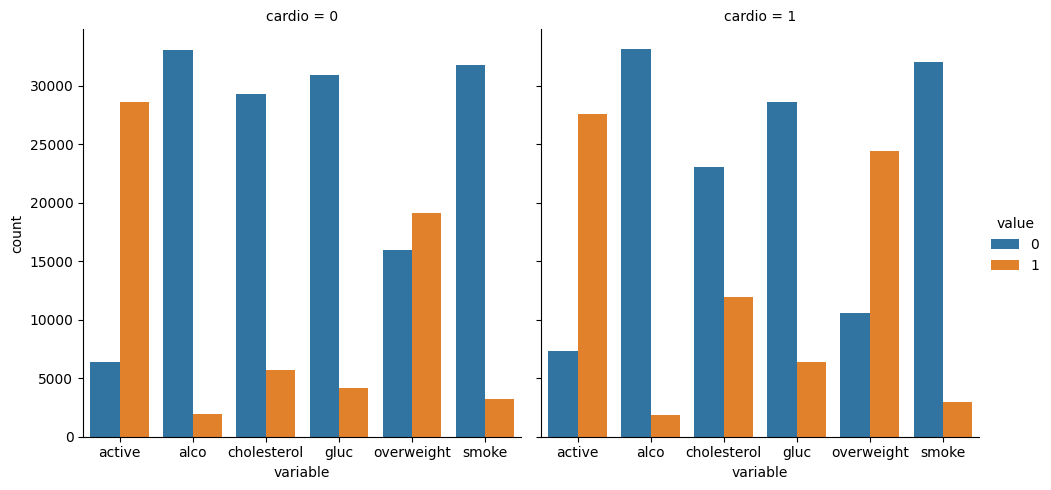

In [59]:
sns.catplot(data=new_df,x='variable',col='cardio',hue='value',kind='count');
#x-varialbe used on the x-axis
#col: The 'cardio' column is used to create multiple subplots based on its unique values.
#hue: The 'value' column is used to differentiate data points within each subplot.
#kind: CountPlot

In [60]:
df_heat=df[(df['ap_lo']<=df['ap_hi'])&(df['height']>=df['height'].quantile(0.025)) & (df['height']<=df['height'].quantile(0.975))
          &(df['weight']>=df['weight'].quantile(0.025)) & (df['weight']<=df['weight'].quantile(0.975))]

In [61]:
heatCorr=df_heat.corr()

In [69]:
mask=np.triu(heatCorr)

<Axes: >

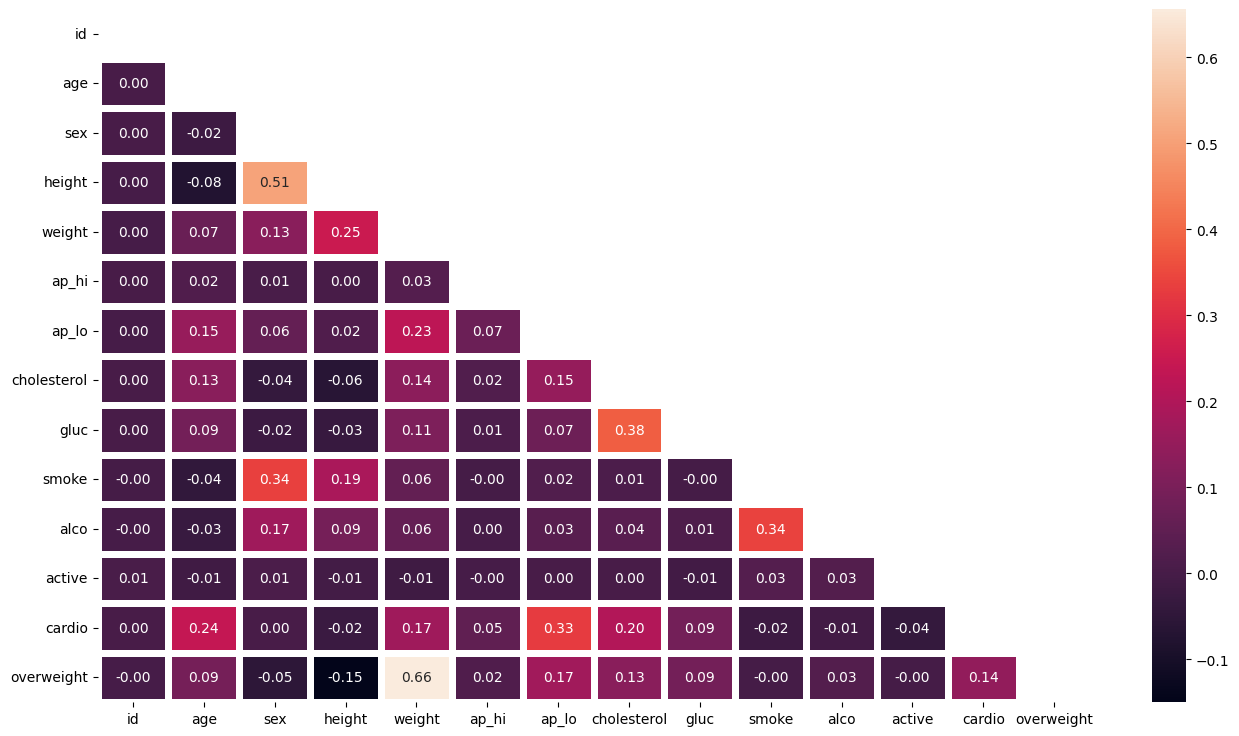

In [70]:
plt.figure(figsize=(16,9))
sns.heatmap(heatCorr,annot=True,linewidth=5,fmt='.2f',mask=mask)
#annot- to display values in the heatmap
#fmt - no of decimal places 
#mask - masking of upper triangle